<a href="https://colab.research.google.com/github/harshita22chourasiya/OIBSIP/blob/main/Car_Price_Prediction_with_Machine_Learning_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Price Prediction with Machine Learning**

**Import required libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from google.colab import drive

**Upload the Dataset**

In [2]:
from google.colab import files

uploaded = files.upload()


Saving car data.csv to car data.csv


In [3]:
{'car data.csv': 'car data.csv'}


{'car data.csv': 'car data.csv'}

**Load the Dataset**

In [4]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Verify the Data**

In [5]:
print(data.isnull().sum())

print(data.shape)

print(data.info())
print(data.describe())


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64
(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000

 **Drop the Categorical Columns**

In [6]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
print(numeric_data.head())



   Year  Selling_Price  Present_Price  Driven_kms  Owner
0  2014           3.35           5.59       27000      0
1  2013           4.75           9.54       43000      0
2  2017           7.25           9.85        6900      0
3  2011           2.85           4.15        5200      0
4  2014           4.60           6.87       42450      0


**Exploratory Data Analysis (EDA)**

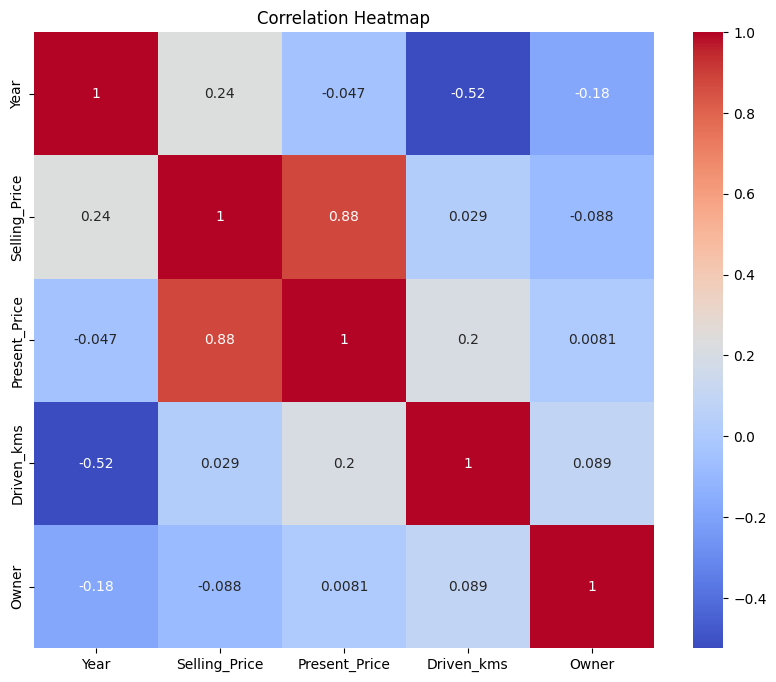

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Data Preprocessing**

In [8]:
# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)
print(data.head())


   Year  Selling_Price  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
0  2014           3.35           5.59       27000      0               False   
1  2013           4.75           9.54       43000      0               False   
2  2017           7.25           9.85        6900      0               False   
3  2011           2.85           4.15        5200      0               False   
4  2014           4.60           6.87       42450      0               False   

   Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
0               False                   False                       False   
1               False                   False                       False   
2               False                   False                       False   
3               False                   False                       False   
4               False                   False                       False   

   Car_Name_Bajaj Avenger 150 street  ...  Car_Name_swif

In [9]:
print(data.columns)

X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)




Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)
Features shape: (301, 105)
Target shape: (301,)


**Training and Testing sets**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train a Linear Regression model**

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Check model coefficients**

In [ ]:
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [ 5.80144781e-01  6.02137403e-01 -2.92733664e-06  2.70088702e-01
 -4.15629597e+00  2.32347475e-12 -6.22086303e+00 -6.60199919e+00
 -6.71394382e+00 -7.05440272e+00 -6.23407259e+00 -4.04183118e+00
 -5.10187680e+00 -4.91032511e+00 -6.98083245e+00 -8.80448492e-13
 -5.67575449e+00 -3.05832707e+00 -5.10036233e+00 -4.80562182e+00
 -6.58278794e+00 -2.37713768e+00 -5.54156822e+00 -5.61046315e+00
 -5.19087255e+00 -3.86438861e+00 -4.40165138e+00 -2.04772986e+00
 -6.49561356e+00 -6.63120876e+00 -6.73343975e+00 -6.19480733e+00
 -4.91402842e-01 -7.43249906e-12 -7.61039468e+00 -7.05643910e+00
 -1.74356845e+00  1.07158726e-11 -6.25117958e+00 -4.28708075e+00
 -5.73426354e+00  6.90425495e-12 -3.64655720e+00 -6.67965275e+00
 -6.00512948e+00 -6.81302091e+00 -6.32417829e+00 -6.48131621e+00
 -6.52771737e+00 -5.64330989e+00 -2.86641415e+00 -5.06707515e+00
 -5.93945787e+00 -2.65282777e+00 -5.83821377e+00 -4.84019301e+00
 -5.94751076e+00 -7.26012681e+00 -3.71814962e+00 -5.64162519e-12
 -6.4

**Make predictions on the test dataset**

In [ ]:
y_pred = model.predict(X_test)


**Evaluate the model using metrics**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 9.221090393053911
R-squared Score: 0.5997023481244084


**Plot Actual vs Predicted Prices**

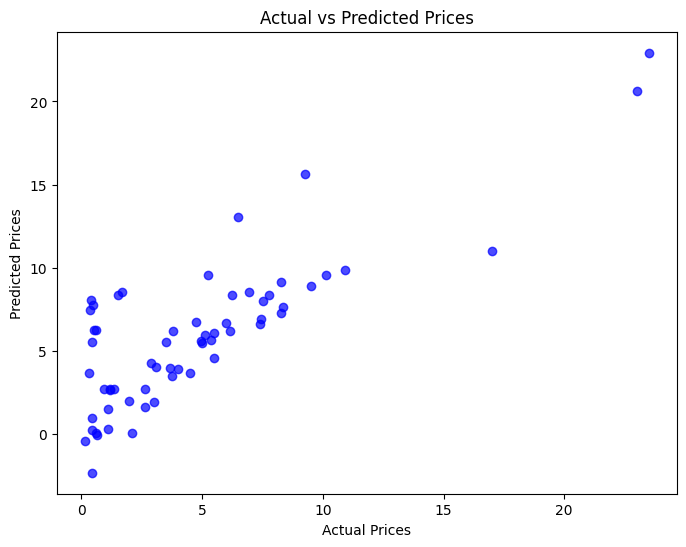

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


**Save and Export the Model**

In [ ]:
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

from google.colab import files
files.download('car_price_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>